Carregar imagens do diretorio

In [1]:
import os 
#pega o diretorio onde esta sendo executado e organiza o path 
current_dir = os.path.abspath(os.getcwd())
current_dir

'd:\\Desktop\\Documents\\GitHub\\DeepLearning_Study'

In [2]:
import glob 
#Acessa a pasta Treino
original_path = current_dir +"\\train\\"
aux_path = current_dir +"\\train_copy\\"
#Cria uma lista apenas arquivos iniciados com dog.
dog_img_files = glob.glob(aux_path + 'dog.*')
#Cria uma lista apenas arquivos iniciados com cat.
cat_img_files = glob.glob(aux_path + 'cat.*')


Função Padrão para exibir imagens 

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def showImages(imgsArray, titlesArray, size, grid=(1,1)):

    y, x = grid
    fig, axes = plt.subplots(y, x, figsize = size)
    axes = axes.ravel() if isinstance(axes, np.ndarray) else np.array([axes])

    if len(imgsArray) != len(titlesArray):
        print("Error: the numbers of images and titles has to be the same!")
        return
    
    for idx, (img,title) in enumerate(zip(imgsArray, titlesArray)):
        if len(img.shape) == 2: # the image is gray tones
            axes[idx].imshow(img, cmap='gray')
        else : # the image is RGB
            axes[idx].imshow(img)
        axes[idx].set_title(title, fontdict={'fontsize':18, 'fontweight': 'medium'}, pad=10)
        if len(title) == 0:
            axes[idx].axis('off')

    plt.tight_layout() 
    plt.show()

Exibir 9 imagens de cachorros aleatórias

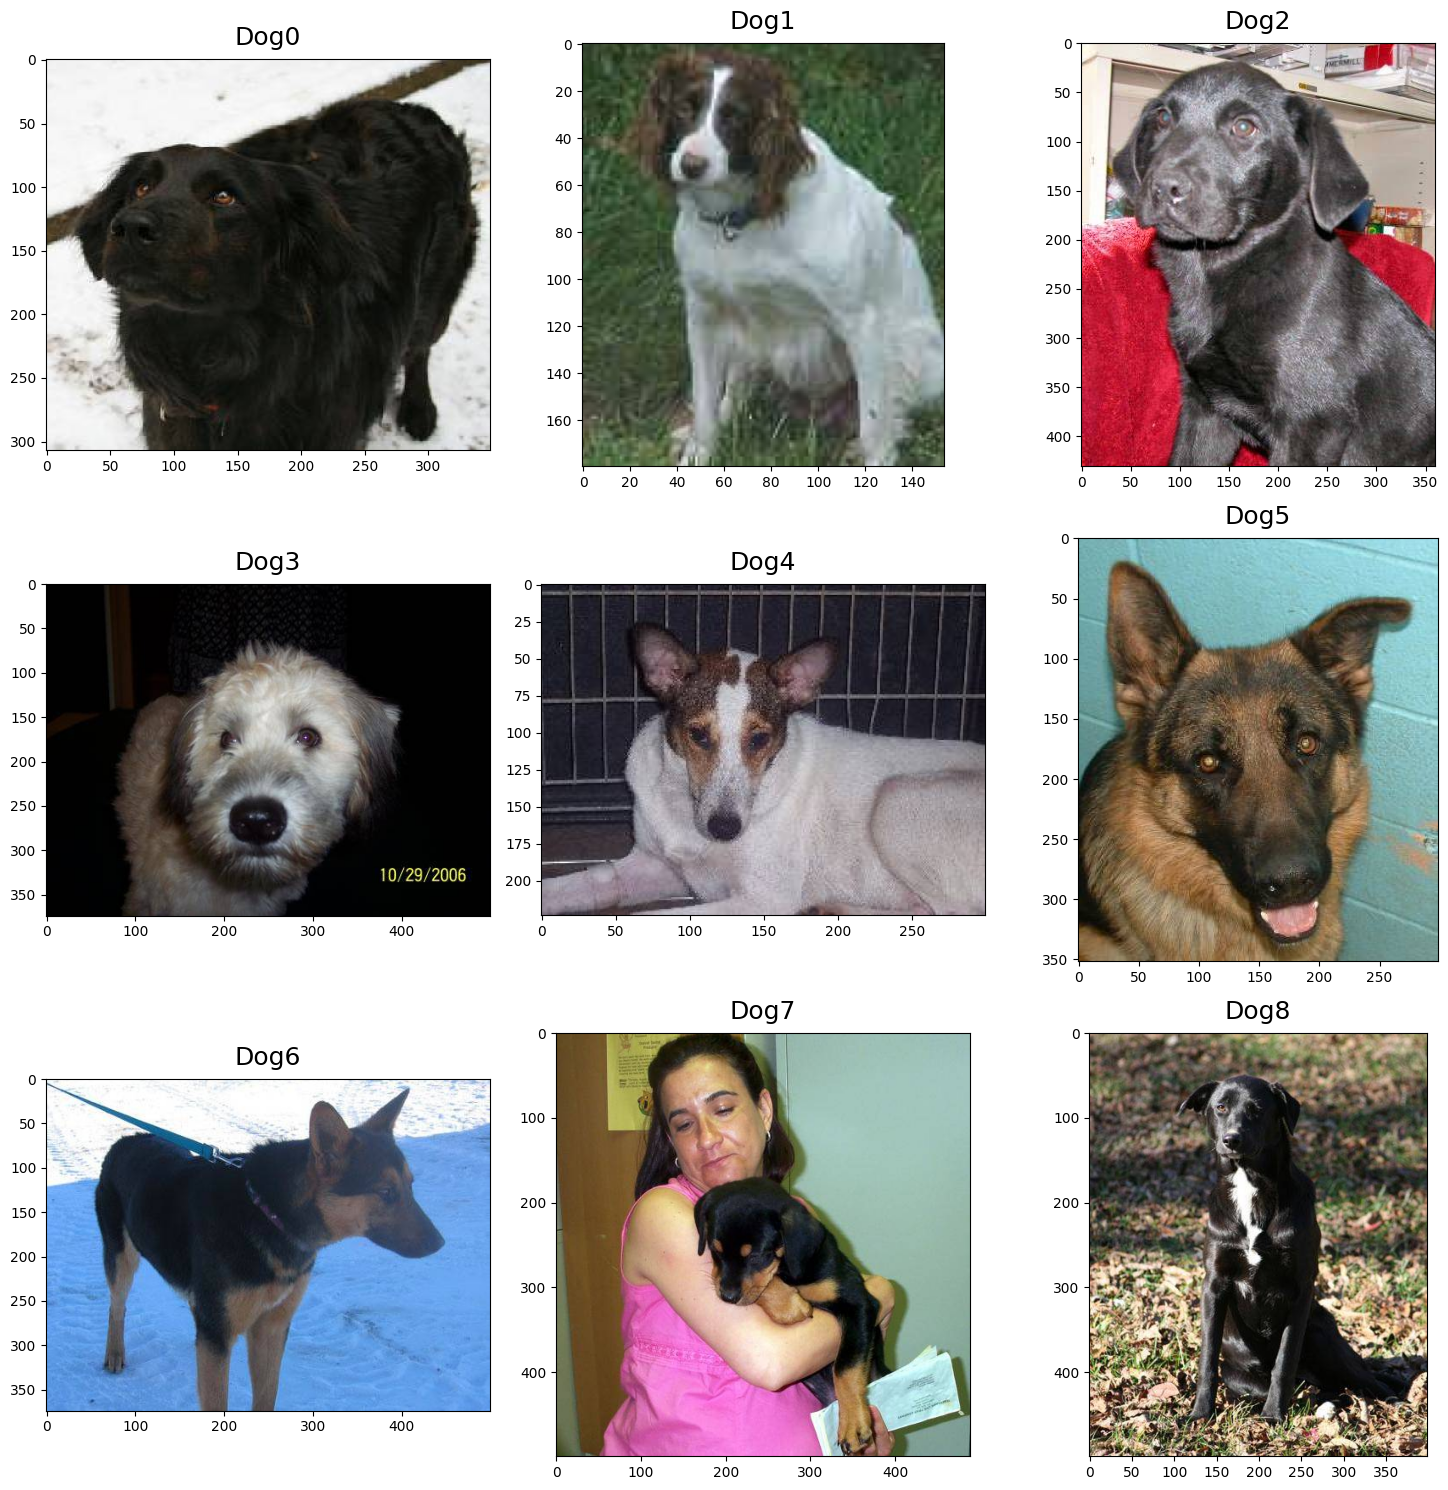

In [4]:
import random
import cv2

random_dog_imgs = [cv2.imread(img_file) for img_file in random.sample(dog_img_files, 9)]
random_dog_imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in random_dog_imgs]
titiles = ['Dog' + str(i) for i in range(9)]

showImages(random_dog_imgs, titiles, (15,15),(3,3))


Exibir 9 imagens de gatos aleatórias

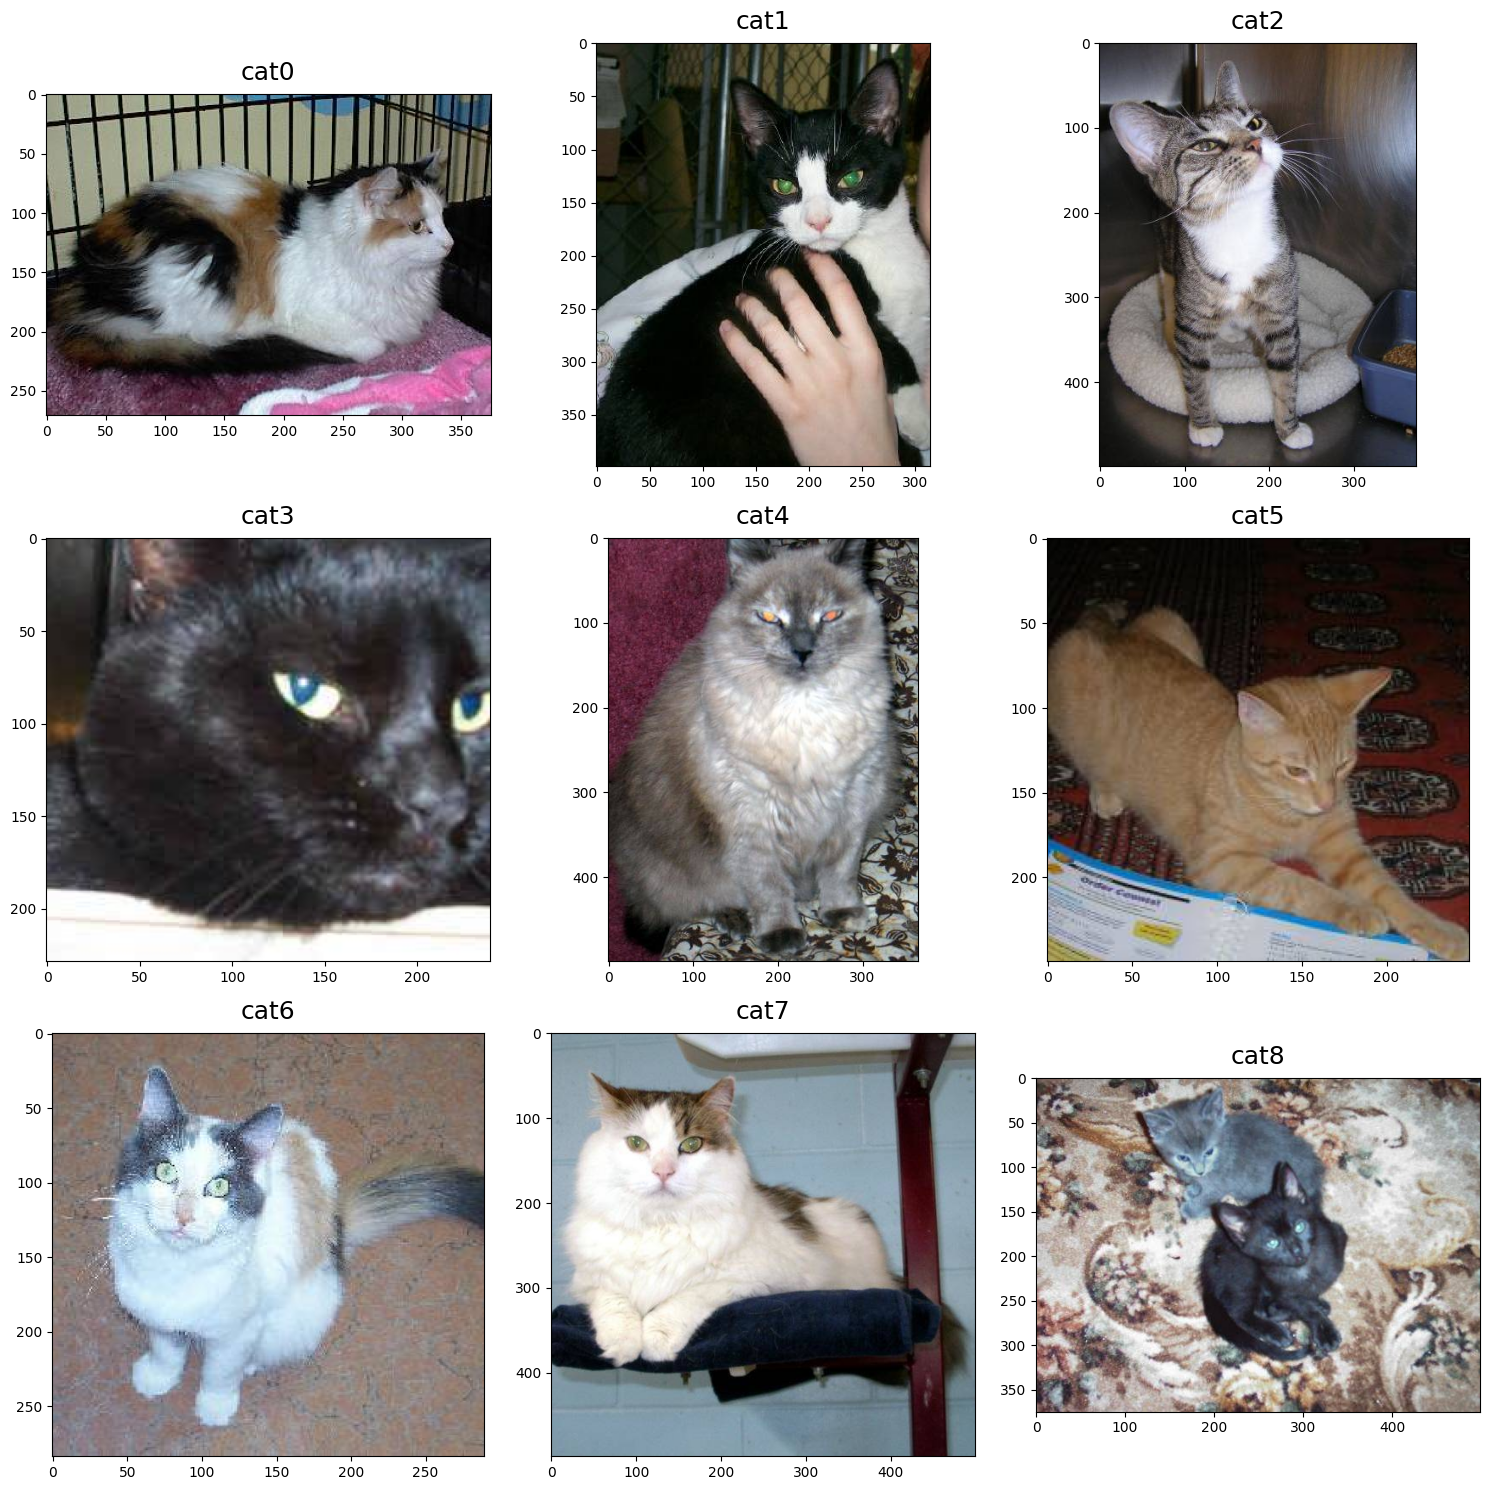

In [5]:
import random
import cv2

random_cat_imgs = [cv2.imread(img_file) for img_file in random.sample(cat_img_files, 9)]
random_cat_imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in random_cat_imgs]
titiles = ['cat' + str(i) for i in range(9)]

showImages(random_cat_imgs, titiles, (15,15),(3,3))

Converter base de dados para treino, validação e teste 

In [6]:
#Criar pastas para atenter a estrutura do Keras/Tensorflow

folder = "\\cats_and_dogs_dataset"
train_folder = current_dir + folder + "\\train"
val_folder = current_dir + folder + "\\validation"
test_folder = current_dir + folder + "\\test"

In [7]:
import os
exist_path = current_dir +"\\cats_and_dogs_dataset"
#verifica se ja existe a pasta 
if not os.path.exists(exist_path):
    os.mkdir(current_dir + folder)#cria nova pasta do dataset
    os.mkdir(train_folder)#cria nova pasta de treino
    os.mkdir(val_folder)#cria nova pasta de validação
    os.mkdir(test_folder)#ceia nova pasta de teste

#cria pastas de Treino, validacao e teste para cada classe
new_folder_train_dogs = train_folder + "\\dogs"
new_folder_train_cats = train_folder + "\\cats"

new_folder_val_dogs = val_folder + "\\dogs"
new_folder_val_cats = val_folder + "\\cats"

new_folder_test_dogs = test_folder + "\\dogs"
new_folder_test_cats = test_folder + "\\cats"

#verifica a existencia, caso nao exista cria
if not os.path.exists(exist_path+"\\train\\dogs"):
    os.mkdir(new_folder_train_dogs)
    os.mkdir(new_folder_train_cats)
if not os.path.exists(exist_path+"\\validation\\dogs"):
    os.mkdir(new_folder_val_dogs)
    os.mkdir(new_folder_val_cats)
if not os.path.exists(exist_path+"\\test\\dogs"):
    os.mkdir(new_folder_test_dogs)
    os.mkdir(new_folder_test_cats)


Alocação das imgs à devidas pastas

In [8]:

import shutil

percent_val = 0.10 #10% das imagens seram usadas para validação
percent_test = 0.20 #20% das imagens seram usadas para teste
# consequentemente 70% seram usadas para treinamento

def moveImagesToCorectFolder():
    #Lista dos arquivos onde encontram-se 
    dog_train_file = glob.glob(original_path  + 'dog.*')
    cat_train_files = glob.glob(original_path + 'cat*')

    #Para cada imagem de cachorro, mover para a pasta correta
    for f in dog_train_file:
        rand_val = random.random()
        filename = f.split("\\")[-1]#Pega o ultimo nome antes do \\
        if rand_val <= percent_val: # pega ate 10% das imagens de forma aleatoria
            shutil.move(f, new_folder_val_dogs + "\\" + filename) #move da pasta origem para val de cachorro
        elif rand_val > percent_val and rand_val <= percent_val + percent_test:#Pega ate 30% das imagens 
            shutil.move(f, new_folder_test_dogs + "\\" + filename) #move da pasta origem para teste de cachorro
        else: #Pega os 70% restante
            shutil.move(f, new_folder_train_dogs + "\\" + filename) #move da pasta origem para treino de cachorro

    #Para cada imagem de gato, mover para a pasta correta
    for f in cat_train_files:
        rand_val = random.random()
        filename = f.split("\\")[-1]#Pega o ultimo nome antes do \\
        if rand_val <= percent_val: # pega ate 10% das imagens de forma aleatoria
            shutil.move(f, new_folder_val_cats + "\\" + filename) #move da pasta origem para val de gato
        elif rand_val > percent_val and rand_val <= percent_val + percent_test:#Pega ate 30% das imagens 
            shutil.move(f, new_folder_test_cats + "\\" + filename) #move da pasta origem para teste de gato
        else: #Pega os 70% restante
            shutil.move(f, new_folder_train_cats + "\\" + filename) #move da pasta origem para treino de gato

moveImagesToCorectFolder()
#remove pasta original caso ainda ela exista
if  os.path.exists(original_path):
    os.rmdir(original_path)
